# Welcome to Assignment 2

In this assignment, we would love you to explore the dataset c.elegans, a dataset of C. Elegans' neural network. It would be an excellent opportunity to get familiar with Networkx. 

In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot

First, let's start reading the data. Remember that every time you read network data, make sure the type of networks you want to create. The functions provided for networks are different depending on their types. In this assignment, the one we will explore is directed weighted network, `class nx.Digraph`.

There is the canvas link (https://iu.instructure.com/files/114453534/download?download_frd=1) for downloading c.elegans. Or you can access the data through the FirstCourseNetworkScience (https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience) git repo. 


Let's take a look at the data first before we decide which method for reading data. 

In [16]:
# make sure to repalce the path of the data when you run the code
edges = pd.read_csv('../FirstCourseNetworkScience/datasets/celegansneural/celegansneural.edges', sep = ' ')

In [17]:
edges.head()

,#,"Directed,",weighted
0,135,1,3
1,202,1,2
2,1,2,1
3,8,2,1
4,17,2,6


In [18]:
len(edges)

2345

Now we see the structure of edge data, where the first two columns refer to nodes and the third column refers to the weight of the corresponding edge. It should be noted that the first column stores the outcoming nodes, while the second column stores the incoming nodes. 

In [19]:
G = nx.read_weighted_edgelist('../FirstCourseNetworkScience/datasets/celegansneural/celegansneural.edges',
                             create_using = nx.DiGraph())

It should be noted that the type of node name, in this case, is a string instead of int.

In [20]:
G.has_edge(135,1)

False

In [21]:
G.has_edge('135', '1')

True

In [22]:
G.has_edge('1', '135')

False

Now you have the network object, let's start exploring it a little bit. Please answer the following questions. Interpretation of the result would be appreciated. :)

## Q1. How many nodes and links are in the network G?

In [23]:
E = G.number_of_edges()
print(E)

2345


## Q2. What is the density of network G?

In [24]:
N = G.number_of_nodes()
print(N)

297


In [25]:
D = nx.density(G)
print(D)

0.026674401674401674


In [26]:
Den = (E/(N*(N-1)))
print(Den)

0.026674401674401674


The density is quite low which signifies that not all nodes are connected to all other nodes. This is a sparse network.

## Q3. Please show the node with the largest in-degree, and the node with the largest out-degree.

In [27]:
print(max(G.in_degree()))

('99', 19)


In [28]:
in_degree_max = max(G.nodes(),key=G.in_degree())
max_in_deg = G.in_degree(in_degree_max)
print("Node with Maximum in Degree:", in_degree_max, "With the in degree value :",max_in_deg)

Node with Maximum in Degree: 45 With the in degree value : 134


In [29]:
out_degree_max = max(G.nodes(),key=G.out_degree())
max_out_deg = G.out_degree(out_degree_max)
print("Node with Maximum Out Degree:", out_degree_max, "with the out degree value :",max_out_deg)

Node with Maximum Out Degree: 3 with the out degree value : 39


## Q4. Please show the node with the largest in-strength, and the one with the largest out-strength.

In [30]:
in_strength_max = max(G.nodes(),key=G.in_degree(weight='weight'))
max_in_str = G.in_degree(in_strength_max,weight='weight')
print("Node with Maximum in Strength:", in_strength_max, "With the in strength value :",max_in_str)

Node with Maximum in Strength: 45 With the in strength value : 1700.0


In [31]:
out_strength_max = max(G.nodes(),key=G.out_degree(weight='weight'))
max_out_str = G.out_degree(out_strength_max,weight='weight')
print("Node with Maximum Out Strength:", out_strength_max, "With the Out strength value :",max_out_str)

Node with Maximum Out Strength: 3 With the Out strength value : 197.0


## Q5. Please calculate the average in-degree and out-degree of the network G. Briefly interpret your finding.

In [32]:
in_deg_list = [G.in_degree(n) for n in G.nodes]
out_deg_list = [G.out_degree(n) for n in G.nodes]
print("Average In Degree:",(sum(in_deg_list)/N))
print("Average Out Degree:",(sum(out_deg_list)/N))

Average In Degree: 7.895622895622895
Average Out Degree: 7.895622895622895


For any network the In Degree and Out Degree will be equal because an outgoing edge for a node is incoming for another therefore the number of incoming and outgoing connections will be the same.

## Q6. Draw the network.

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

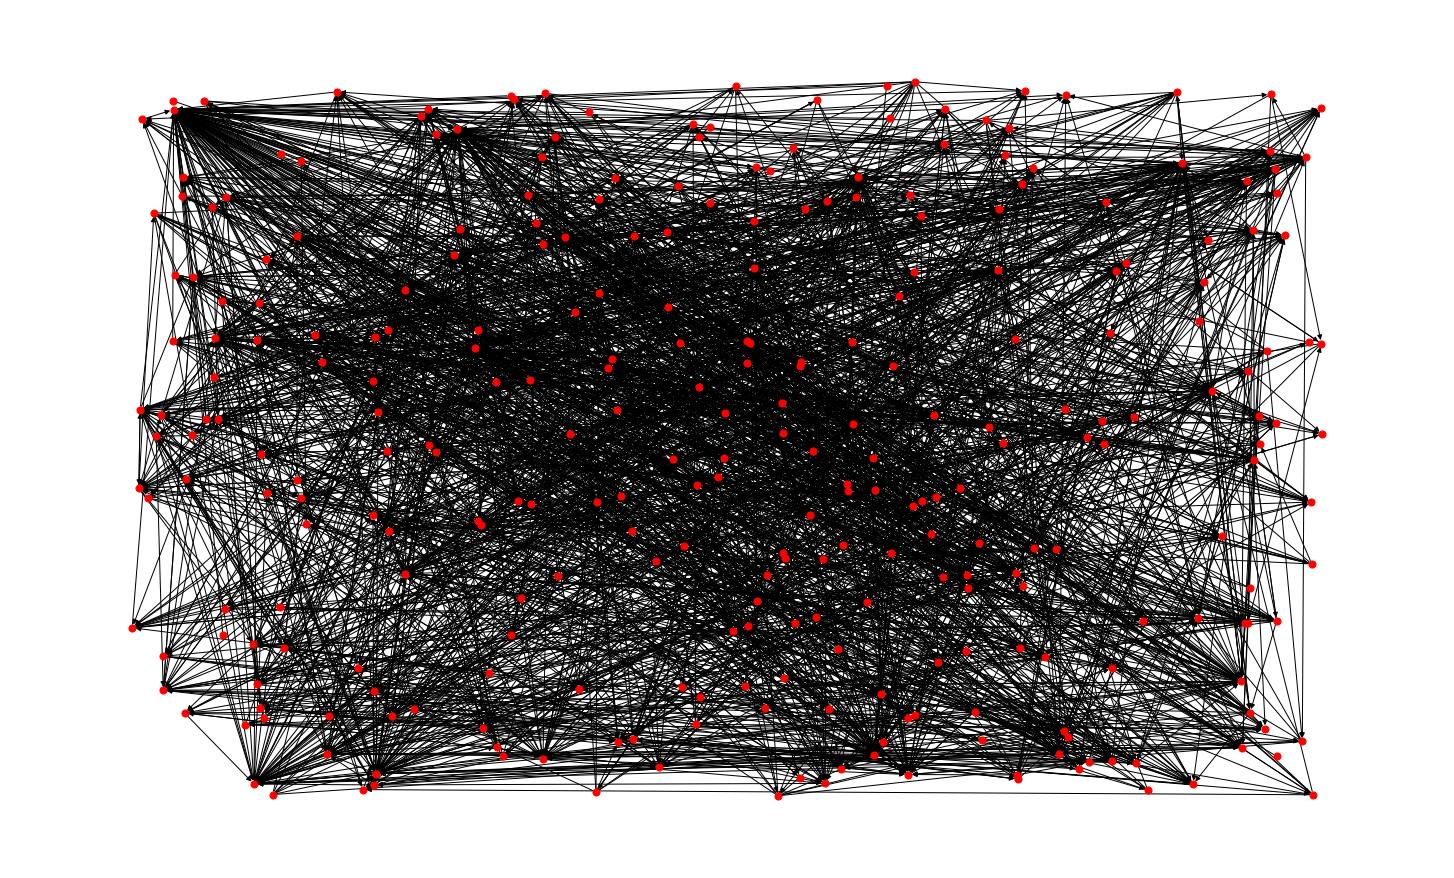

In [34]:
nx.draw_random(G,node_color='red',node_size=50,with_labels=False)

## Q7. Are there any nodes with zero in-degree? How many?

In [35]:
zero_in = [G.in_degree(n) for n in G.nodes if G.in_degree(n) == 0]
print("Number of nodes with 0 In degree", len(zero_in))

Number of nodes with 0 In degree 27


## Q8. Are there any nodes with zero out-degree? How many?

In [36]:
zero_out = [G.out_degree(n) for n in G.nodes if G.out_degree(n) == 0]
print("Number of nodes with 0 out degree", len(zero_out))

Number of nodes with 0 out degree 3


There comes the fun parts. Time to explore common neighbours. 

## Q9. Which pair of nodes have the largest number of common predecessors?

In [37]:
mf = 0
n1 = ''
n2 = ''
for node_1,node_2 in G.edges():
    temp = 0
    plist1 = G.predecessors(node_1)
    plist2 = G.predecessors(node_2)
    if node_1 != node_2:
        temp = len(set(plist1).intersection(set(plist2)))
        if temp > mf:
            mf = temp
            n1 = node_1
            n2 = node_2
print("Nodes ",n1, " and ",n2," have ",mf, " common predecessors")

Nodes  3  and  119  have  21  common predecessors


## Q10. Which pair of nodes have the largest number of common successors?

In [38]:
mf = 0
n1 = ''
n2 = ''
for node_1,node_2 in G.edges():
    temp = 0
    plist1 = G.successors(node_1)
    plist2 = G.successors(node_2)
    if node_1 != node_2:
        temp = len(set(plist1).intersection(set(plist2)))
        if temp > mf:
            mf = temp
            n1 = node_1
            n2 = node_2
print("Nodes ",n1, " and ",n2," have ",mf, " common successors")

Nodes  3  and  13  have  29  common successors


## For the following questions, please read c.elegans as undirected network.

You can reread the c.elegans file, or try nx.Graph(G) to force the directed graph into an undirected graph.

In [39]:
UG = nx.read_weighted_edgelist('../FirstCourseNetworkScience/datasets/celegansneural/celegansneural.edges',
                             create_using = nx.Graph())

## Q11. What's the average path length?

In [26]:
nx.average_shortest_path_length(UG)

2.455318955318955

## Q12. What's the diameter?

In [27]:
nx.diameter(UG)

5

## Q13. Which node has the largest clustering coefficient?

In [44]:
ug_cluster = nx.clustering(UG,weight='weights')
v=list(ug_cluster.values())
k=list(ug_cluster.keys())
print(k[v.index(max(v))])

252


## Q14. What's the average clustering coefficient?

In [29]:
print(nx.average_clustering(UG))

0.2923632978321901
